In [1]:
import numpy as np
from scipy.optimize import NonlinearConstraint, minimize
import matplotlib.pyplot as plt

In [2]:
from itertools import chain
def flatten(xs):
    '''Flatten a sequence of sequences.'''
    return chain(*xs)

In [3]:
def objective_function(x):
    r, _, _ = x
    return r

In [4]:
def constraint_function(s, t, P):
    '''Return the constraint function corresponding to a given sign, t, and P.'''
    def ret(x):
        r, a, b = x
        return r + s*(P - a*np.exp(b*t))
    return ret

In [5]:
def constraint_pair(t, P):
    '''Return a pair of constraints for a given t and P.'''
    return (
        NonlinearConstraint(
            constraint_function(s, t, P), # constraint function
            0.0, # lower bound
            np.inf, # upper bound
        )
        for s in (-1, 1)
    )

In [6]:
data = np.array([
    [7, 8],
    [14, 41],
    [21, 133],
    [28, 250],
    [35, 280],
    [42, 297],
])

constraints = [constraint_pair(t, P) for (t, P) in data]
constraints = flatten(constraints)

In [7]:
result = minimize(
    objective_function,
    [0, 0, 0], # initial guess (required)
    method='trust-constr',
    constraints=constraints,
)

/home/ncoltharp/opt/anaconda3/envs/math_modeling/lib/python3.7/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [8]:
a = result.x[1]
b = result.x[2]
print('a:', a)
print('b:', b)

a: 50.943011703569056
b: 0.04652764223061992


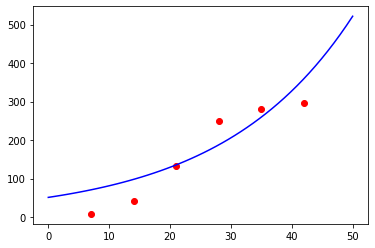

In [9]:
def P(t, a, b):
    return a*np.exp(b*t)

plt.scatter(data[:, 0], data[:, 1], c='red')
xs = np.linspace(0, 50)
plt.plot(xs, P(xs, a, b), c='blue')